In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\lenovo\Downloads\stocks.csv")

In [4]:
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [6]:
df.columns

Index(['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

In [9]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [15]:
df['Ticker'].unique()

array(['AAPL', 'MSFT', 'NFLX', 'GOOG'], dtype=object)

In [16]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [19]:
df.shape

(248, 8)

In [21]:
df.dtypes

Ticker        object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [22]:
df.isnull().any()

Ticker       False
Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [23]:
df.isnull().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# The distribution of the closing prices to understand their range and frequency.

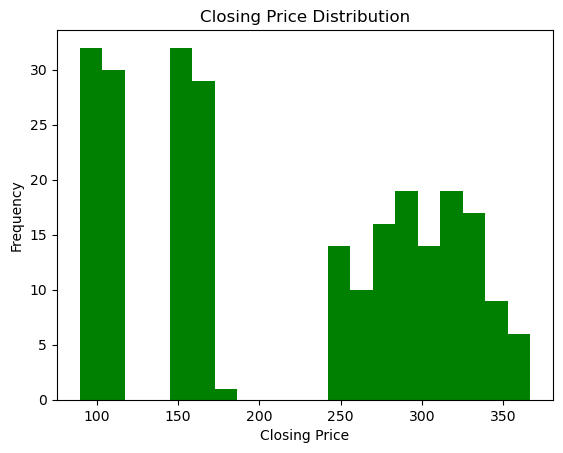

In [9]:
plt.hist(df['Close'], bins=20,color = 'green')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Closing Price Distribution')
plt.show()

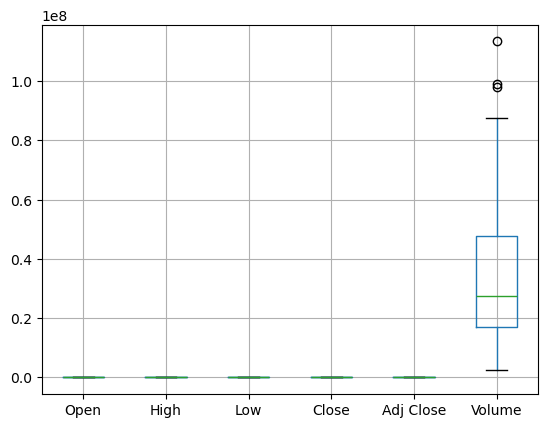

In [28]:
pd.DataFrame(df).boxplot()
plt.show()

# The cumulative volume traded over time to observe any trends or spikes.

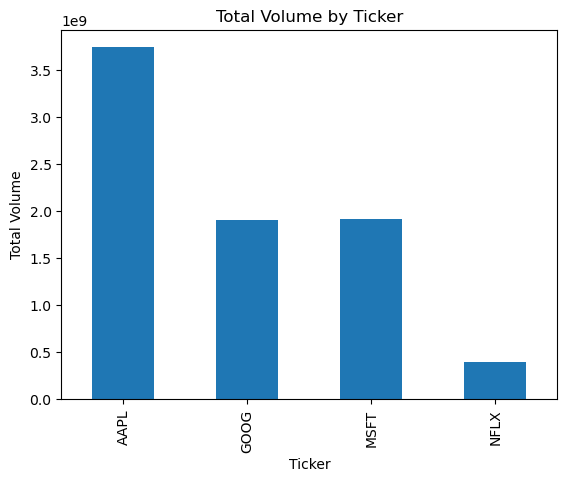

In [31]:
ticker_volume = df.groupby('Ticker')['Volume'].sum()
ticker_volume.plot(kind='bar')
plt.xlabel('Ticker')
plt.ylabel('Total Volume')
plt.title('Total Volume by Ticker')
plt.show()

# Exploring the relationship between volume and closing prices,to identify any correlations.

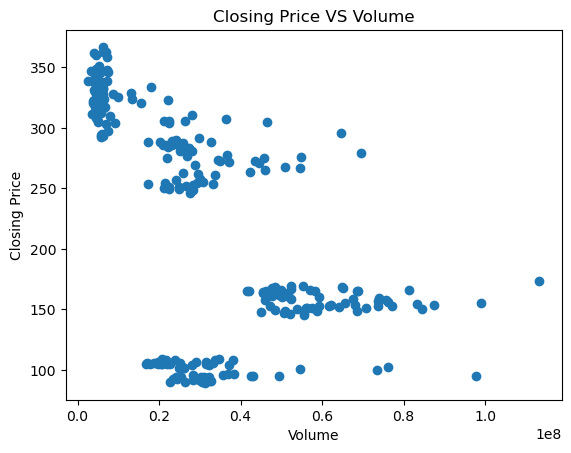

In [35]:

plt.scatter(df['Volume'],df['Close'])
plt.xlabel("Volume")
plt.ylabel('Closing Price')
plt.title('Closing Price VS Volume')
plt.show()

# Illustrating the distribution of the closing prices, including the median, quartiles, and outliers.

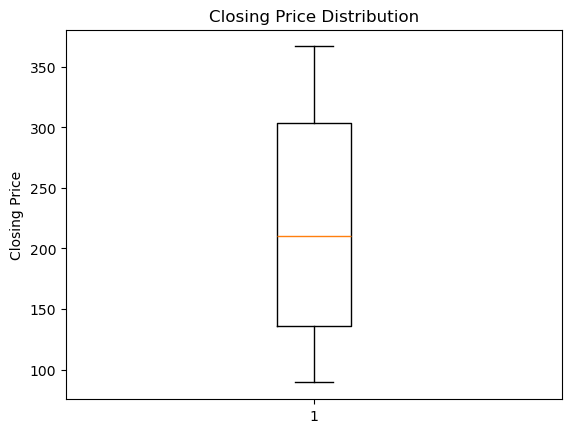

In [37]:

plt.boxplot(df['Close'])
plt.ylabel('Closing Price')
plt.title('Closing Price Distribution')
plt.show()

# Illustrating the distribution of the closing prices, including the median, quartiles, and outliers.

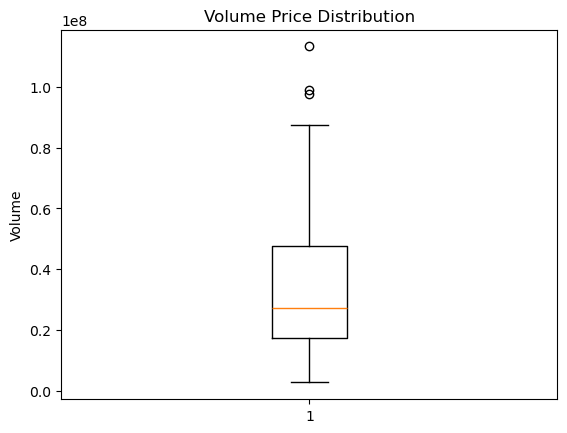

In [6]:
plt.boxplot(df['Volume'])
plt.ylabel('Volume')
plt.title('Volume Price Distribution')
plt.show()

In [43]:
my_val=pd.DataFrame({"Volume":df["Volume"]})
my_val.head(5)

,Volume
0,83322600
1,64120100
2,56007100
3,57450700
4,62199000


In [46]:
q75,q25 = np.percentile(my_val,[75,25])
q75,q25

(47717725.0, 17141800.0)

In [47]:
IQR = q75-q25
IQR

30575925.0

In [49]:
q0=q25-(IQR*1.5)
q100=q75+(IQR*1.5)
q0,q100

(-28722087.5, 93581612.5)

In [50]:
my_val.mean()

Volume    3.208210e+07
dtype: float64

In [51]:
my_val.median()

Volume    27340000.0
dtype: float64

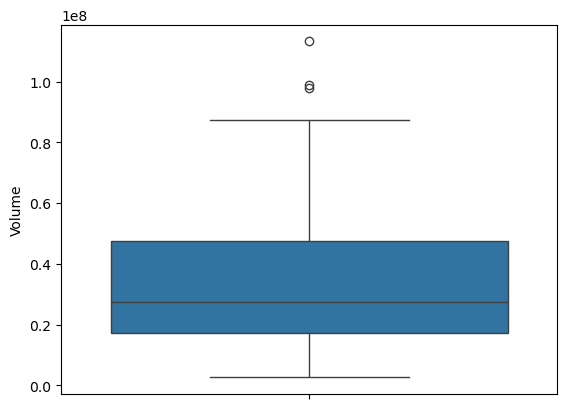

In [53]:
sns.boxplot(data=df['Volume'])
plt.show()

In [54]:
my_val.mode()

,Volume
0,2657900
1,3298100
2,3479500
3,3676100
4,3879700
...,...
243,84457100
244,87558000
245,97798600
246,98944600


In [55]:
my_val=my_val[(my_val["Volume"]>=q0) & (my_val["Volume"]<=q100)]
my_val

,Volume
0,83322600
1,64120100
2,56007100
3,57450700
4,62199000
...,...
243,20926300
244,20343100
245,17116300
246,19780600


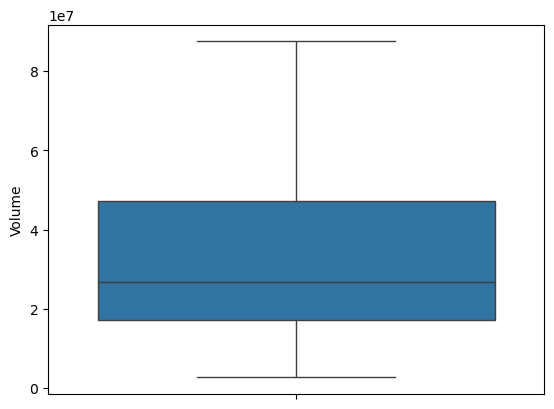

In [56]:
sns.boxplot(my_val["Volume"])
plt.show()

In [57]:
df.head(5)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
